# PyTorch ToyProblem: Sushi Classification with VGGNet - 2018.07.05

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

In [2]:
# Getting train & test dataset

transform = torchvision.transforms.Compose([
    transforms.RandomCrop(224),
    transforms.ToTensor()
])

rootdir = './data/sushi_rolls/'
train_dir = rootdir + 'train/' # 40 data on each label
test_dir = rootdir + 'test/' # 10 data on each label

composer = [
    transforms.Resize(224),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])    
]

train_dataset = torchvision.datasets.ImageFolder(
    train_dir,
    transforms.Compose(composer)
)

test_dataset = torchvision.datasets.ImageFolder(
    test_dir,
    transforms.Compose(composer)
)

batch_size = 20
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=4)

Label for image 1 = 2
Label for image 2 = 0
Label for image 3 = 1
Label for image 4 = 1
Label for image 5 = 3
Label for image 6 = 0
Label for image 7 = 1
Label for image 8 = 1
Label for image 9 = 3


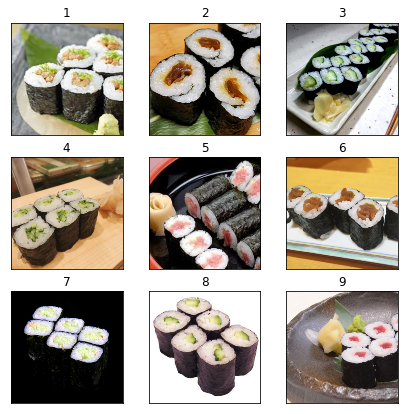

In [3]:
# Some simple visualization

plt.subplots(figsize=(7,7))
for i in range(9):
    pickup = np.random.randint(0,len(train_dataset))
    plt.subplot(3,3,i+1)
    plt.title(i+1)
    plt.xticks([])
    plt.yticks([])
    print("Label for image %d = %d" % (i+1, train_dataset[pickup][1]))
    plt.imshow(np.transpose(train_dataset[pickup][0] / 2 + 0.5, (1,2,0)))

In [4]:
# Device setup

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [5]:
# Defining VGGNet

net = torchvision.models.vgg11(pretrained=True)
net.fc = nn.Linear(512, 4) 
net.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(512, 512, kern

In [6]:
# Defining Loss function & Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.005)

In [7]:
# Training

tqdm.monitor_interval = 0
epochs = 10
for epoch in tqdm(range(epochs)):
    print('Epoch %d' % epoch)
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs).to(device)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 10 == 0:
            print('%d data processed. loss = %f' % (i * batch_size, loss))
print('Finished training.')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0


/usr/local/pyenv/versions/3.5.3/lib/python3.5/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


0 data processed. loss = 16.056927


 10%|█         | 1/10 [00:01<00:14,  1.62s/it]

Epoch 1


/usr/local/pyenv/versions/3.5.3/lib/python3.5/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


0 data processed. loss = 1.691867


 20%|██        | 2/10 [00:03<00:13,  1.64s/it]

Epoch 2


/usr/local/pyenv/versions/3.5.3/lib/python3.5/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


0 data processed. loss = 0.979449


 30%|███       | 3/10 [00:04<00:11,  1.65s/it]

Epoch 3


/usr/local/pyenv/versions/3.5.3/lib/python3.5/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


0 data processed. loss = 0.717363


 40%|████      | 4/10 [00:06<00:09,  1.66s/it]

Epoch 4


/usr/local/pyenv/versions/3.5.3/lib/python3.5/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


0 data processed. loss = 0.252837


 50%|█████     | 5/10 [00:08<00:08,  1.65s/it]

Epoch 5


/usr/local/pyenv/versions/3.5.3/lib/python3.5/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


0 data processed. loss = 0.554126


 60%|██████    | 6/10 [00:09<00:06,  1.65s/it]

Epoch 6


/usr/local/pyenv/versions/3.5.3/lib/python3.5/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


0 data processed. loss = 0.132540


 70%|███████   | 7/10 [00:11<00:04,  1.65s/it]

Epoch 7


/usr/local/pyenv/versions/3.5.3/lib/python3.5/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


0 data processed. loss = 0.139480


 80%|████████  | 8/10 [00:13<00:03,  1.66s/it]

Epoch 8


/usr/local/pyenv/versions/3.5.3/lib/python3.5/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


0 data processed. loss = 0.032587


 90%|█████████ | 9/10 [00:14<00:01,  1.66s/it]

Epoch 9


/usr/local/pyenv/versions/3.5.3/lib/python3.5/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


0 data processed. loss = 0.016692


100%|██████████| 10/10 [00:16<00:00,  1.66s/it]

Finished training.


In [8]:
# Testing

net.eval()
correct = 0
total = 0
with torch.no_grad():
    for i, data in tqdm(enumerate(test_loader)):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, prediction = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (prediction == labels).sum().item()
        
print('Accuracy for the test images: %d %%' % (100 * correct / total))

2it [00:00,  9.37it/s]

Accuracy for the test images: 97 %


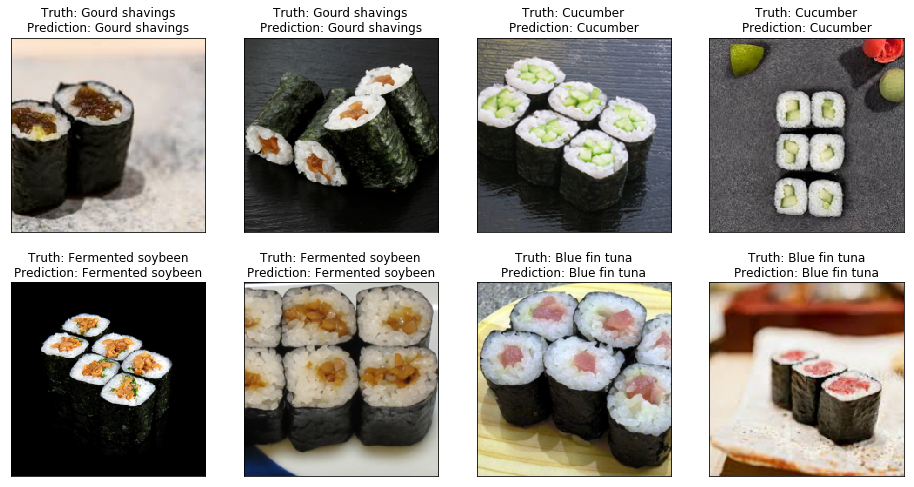

In [13]:
# Testing with additional images (visualization)

sushi_love = torchvision.datasets.ImageFolder(
    './data/sushi_love/',
    transforms.Compose(composer)
)

sushi_loader = torch.utils.data.DataLoader(sushi_love, batch_size=1, shuffle=False, pin_memory=True, num_workers=6)
cls = ['Gourd shavings', 'Cucumber', 'Fermented soybeen', 'Blue fin tuna']
plt.subplots(figsize=(16,9))
plt.subplots_adjust(hspace=0)

with torch.no_grad():
    for i, data in enumerate(sushi_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, prediction = torch.max(outputs.data, 1)
        plt.subplot(2,4,i+1)

        plt.xticks([])
        plt.yticks([])
        prediction = prediction.cpu().detach().numpy()[0]
        plt.title('Truth: {}\nPrediction: {}'.format(cls[sushi_love[i][1] - 1], cls[prediction]))
        plt.imshow(np.transpose(sushi_love[i][0] / 2 + 0.5, (1,2,0)))
